<a href="https://www.kaggle.com/code/muhammadumairab/fork-of-internet-users-in-south-asia?scriptVersionId=127436882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd


# 1. Loading datsets

In [2]:
#Loading the "Internet users ..." dataset
data = pd.read_csv("/kaggle/input/worldwide-internet-users/Internet Users percent of population.csv")

In [3]:
data.shape

(266, 34)

In [4]:
data.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.768383,NaN,...,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,0.0,0.001599,0.004664,0.013609,0.029658,0.081216,0.106349,0.202056,...,8.575522,10.189313,12.304789,14.625664,15.894355,18.240060,21.700695,24.304658,27.350308,NaN
2,Afghanistan,AFG,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,5.454545,5.900000,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.400000,NaN
3,Africa Western and Central,AFW,0.0,0.000000,0.000000,0.000000,0.000004,0.000129,0.007035,0.019842,...,10.293447,12.577170,14.934062,18.192287,20.926632,24.663587,29.338368,31.785861,34.128137,NaN
4,Angola,AGO,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000776,0.005674,...,7.700000,13.000000,21.400000,22.000000,23.200000,26.000000,29.000000,32.400000,36.000000,NaN


In [5]:
#Loading the "Division of countries..." dataset
region_name = pd.read_csv("/kaggle/input/worldwide-internet-users/Division of countries on the basis of income, region etc.csv")

In [6]:
region_name.shape

(265, 4)

In [7]:
region_name.head()

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFE,NaN,NaN,Africa Eastern and Southern
2,AFG,South Asia,Low income,Afghanistan
3,AFW,NaN,NaN,Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,Angola


# 2. Preprocessing
Let's doo some data cleaning

In [8]:
#Let's check for NaN values in the data DataFrame
print(np.sum(data.isnull()))

Country Name      0
Country Code      0
1990             10
1991             10
1992             10
1993             10
1994             10
1995             10
1996             49
1997             37
1998             31
1999             24
2000             23
2001             19
2002             16
2003             22
2004             19
2005             18
2006             19
2007             14
2008             16
2009             16
2010             17
2011             14
2012             16
2013             17
2014             17
2015             18
2016             15
2017             13
2018             57
2019             63
2020             69
2021            266
dtype: int64


DataFrame **data**'s missing values are of datatype **int**. That is, missing values are present in some of the **year**' columns. And **Country Name** & **Country Code** columns have no NaN values.

**Note**: The **int** vs **str** distingtion will be usefull in filling these NaN values.

In [9]:
#Let's check for NaN values in the region_name DataFrame
print(np.sum(region_name.isnull()))

Country Code     0
Region          48
IncomeGroup     49
TableName        0
dtype: int64


DataFrame **region_name**'s missing values are of datatype **str**. That is, missing values are present in **Region** & **IncomeGroup** columns, both of which store **str** values.

**Note**: The **int** vs **str** distingtion will be usefull in filling these NaN values


In [10]:
#Total number of NaN values
print("Total NaN values in data =",np.sum(np.sum(data.isnull())))
print("Total NaN values in region_name =",np.sum(np.sum(region_name.isnull())))

Total NaN values in data = 965
Total NaN values in region_name = 97


In [11]:
#Let's fill the NaN values in the dataset
data.fillna(value=0,inplace=True)
#For data DataFrame, we've chosen an "int" substitute
region_name.fillna(value="Missing data",inplace=True)
#For region_name DataFrame, we've chosen a "str" substitute


In [12]:
#Let's verify the results
print("Total NaN values in data =",np.sum(np.sum(data.isnull())))
print("Total NaN values in region_name =",np.sum(np.sum(region_name.isnull())))

Total NaN values in data = 0
Total NaN values in region_name = 0


# 3. Combining two datasets

In [13]:
merged_data=pd.merge(left=data,right=region_name,left_on="Country Name",right_on="TableName")
merged_data

,Country Name,Country Code_x,1990,1991,1992,1993,1994,1995,1996,1997,...,2016,2017,2018,2019,2020,2021,Country Code_y,Region,IncomeGroup,TableName
0,Aruba,ABW,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.768383,0.000000,...,93.542454,97.170000,0.000000,0.000000,0.000000,0.0,ABW,Latin America & Caribbean,High income,Aruba
1,Africa Eastern and Southern,AFE,0.0,0.001599,0.004664,0.013609,0.029658,0.081216,0.106349,0.202056,...,15.894355,18.240060,21.700695,24.304658,27.350308,0.0,AFE,Missing data,Missing data,Africa Eastern and Southern
2,Afghanistan,AFG,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,13.500000,16.800000,17.600000,18.400000,0.0,AFG,South Asia,Low income,Afghanistan
3,Africa Western and Central,AFW,0.0,0.000000,0.000000,0.000000,0.000004,0.000129,0.007035,0.019842,...,20.926632,24.663587,29.338368,31.785861,34.128137,0.0,AFW,Missing data,Missing data,Africa Western and Central
4,Angola,AGO,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000776,0.005674,...,23.200000,26.000000,29.000000,32.400000,36.000000,0.0,AGO,Sub-Saharan Africa,Lower middle income,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Kosovo,XKX,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,83.893597,89.443032,0.000000,0.000000,0.0,XKX,Europe & Central Asia,Upper middle income,Kosovo
252,"Yemen, Rep.",YEM,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000621,0.015025,...,24.579208,26.718355,0.000000,0.000000,0.000000,0.0,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
253,South Africa,ZAF,0.0,0.013284,0.038869,0.113747,0.246906,0.676740,0.841883,1.632094,...,54.000000,56.167394,62.400000,68.200000,70.000000,0.0,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
254,Zambia,ZMB,0.0,0.000000,0.000000,0.000000,0.006776,0.008784,0.009069,0.009330,...,10.300000,12.200000,14.299997,16.800000,19.800000,0.0,ZMB,Sub-Saharan Africa,Low income,Zambia


# 4. Plotting the Internet usage of South Asia

In [14]:
#Extracting South Asian region's data
south_asia = merged_data[merged_data.Region == "South Asia"].copy()
south_asia

,Country Name,Country Code_x,1990,1991,1992,1993,1994,1995,1996,1997,...,2016,2017,2018,2019,2020,2021,Country Code_y,Region,IncomeGroup,TableName
2,Afghanistan,AFG,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,13.50,16.8000,17.600000,18.40,0.0,AFG,South Asia,Low income,Afghanistan
20,Bangladesh,BGD,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000751,...,18.100000,19.80,21.8000,23.800000,24.80,0.0,BGD,South Asia,Lower middle income,Bangladesh
32,Bhutan,BTN,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,41.772645,46.20,49.5000,53.500000,53.50,0.0,BTN,South Asia,Lower middle income,Bhutan
107,India,IND,0.0,0.0,0.000111,0.000218,0.001070,0.026229,0.046334,0.070768,...,16.500000,18.20,20.0813,29.400000,43.00,0.0,IND,South Asia,Lower middle income,India
135,Sri Lanka,LKA,0.0,0.0,0.000000,0.000000,0.002765,0.005484,0.054464,0.162465,...,15.100000,21.30,26.0000,29.000000,35.00,0.0,LKA,South Asia,Lower middle income,Sri Lanka
149,Maldives,MDV,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.226930,0.309444,...,59.092590,61.25,62.0700,62.500000,62.93,0.0,MDV,South Asia,Upper middle income,Maldives
175,Nepal,NPL,0.0,0.0,0.000000,0.000000,0.000000,0.000925,0.004510,0.021999,...,20.700000,24.30,28.6000,32.800000,37.70,0.0,NPL,South Asia,Lower middle income,Nepal
181,Pakistan,PAK,0.0,0.0,0.000000,0.000000,0.000000,0.000123,0.002992,0.027549,...,12.385447,13.78,15.3400,17.070902,25.00,0.0,PAK,South Asia,Lower middle income,Pakistan


In [15]:
#Drop the unnecessary columns
south_asia.drop(labels=["Country Code_x","Country Code_y","Region","IncomeGroup",
                        "TableName","2021"],axis='columns',inplace=True)
south_asia

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.00,5.454545,5.90,7.00,8.260000,11.000000,13.50,16.8000,17.600000,18.40
20,Bangladesh,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000751,0.003685,...,4.50,5.000000,6.63,11.90,12.900000,18.100000,19.80,21.8000,23.800000,24.80
32,Bhutan,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.40,15.600000,22.40,30.30,39.800000,41.772645,46.20,49.5000,53.500000,53.50
107,India,0.0,0.0,0.000111,0.000218,0.001070,0.026229,0.046334,0.070768,0.139027,...,10.07,11.100000,12.30,13.50,14.900000,16.500000,18.20,20.0813,29.400000,43.00
135,Sri Lanka,0.0,0.0,0.000000,0.000000,0.002765,0.005484,0.054464,0.162465,0.296351,...,0.00,0.000000,0.00,10.50,12.100000,15.100000,21.30,26.0000,29.000000,35.00
149,Maldives,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.226930,0.309444,0.569627,...,34.00,38.930100,44.10,49.28,54.461955,59.092590,61.25,62.0700,62.500000,62.93
175,Nepal,0.0,0.0,0.000000,0.000000,0.000000,0.000925,0.004510,0.021999,0.064394,...,9.00,11.149300,13.30,15.44,17.581618,20.700000,24.30,28.6000,32.800000,37.70
181,Pakistan,0.0,0.0,0.000000,0.000000,0.000000,0.000123,0.002992,0.027549,0.043948,...,8.00,8.100000,9.00,10.00,11.000000,12.385447,13.78,15.3400,17.070902,25.00


Since years are present as **columns**, we have to take **transpose** of the DataFrame.

In [16]:
SA_T = south_asia.T
SA_T

,2,20,32,107,135,149,175,181
Country Name,Afghanistan,Bangladesh,Bhutan,India,Sri Lanka,Maldives,Nepal,Pakistan
1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,0.0,0.0,0.0,0.000111,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.000218,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.00107,0.002765,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.026229,0.005484,0.0,0.000925,0.000123
1996,0.0,0.0,0.0,0.046334,0.054464,0.22693,0.00451,0.002992
1997,0.0,0.000751,0.0,0.070768,0.162465,0.309444,0.021999,0.027549
1998,0.0,0.003685,0.0,0.139027,0.296351,0.569627,0.064394,0.043948


In [17]:
#rename the columns to appropriate names.
SA_T.rename(columns={2:"Afghanistan",20:"Bangladesh",32:"Bhutan",107:"India",
                     135:"Sri Lanka",149:"Maldives",175:"Nepal",181:"Pakistan"},
            inplace=True)

In [18]:
#Drop the first row because it is not usefull
SA_T.drop(index="Country Name",inplace=True)

In [19]:
SA_T

,Afghanistan,Bangladesh,Bhutan,India,Sri Lanka,Maldives,Nepal,Pakistan
1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,0.0,0.0,0.0,0.000111,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.000218,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.00107,0.002765,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.026229,0.005484,0.0,0.000925,0.000123
1996,0.0,0.0,0.0,0.046334,0.054464,0.22693,0.00451,0.002992
1997,0.0,0.000751,0.0,0.070768,0.162465,0.309444,0.021999,0.027549
1998,0.0,0.003685,0.0,0.139027,0.296351,0.569627,0.064394,0.043948
1999,0.0,0.03617,0.137572,0.273224,0.348414,1.119909,0.146669,0.055357


In [20]:
#Converting years to Panda's datetime objects
SA_T.index = pd.to_datetime(SA_T.index)
SA_T.index

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq=None)

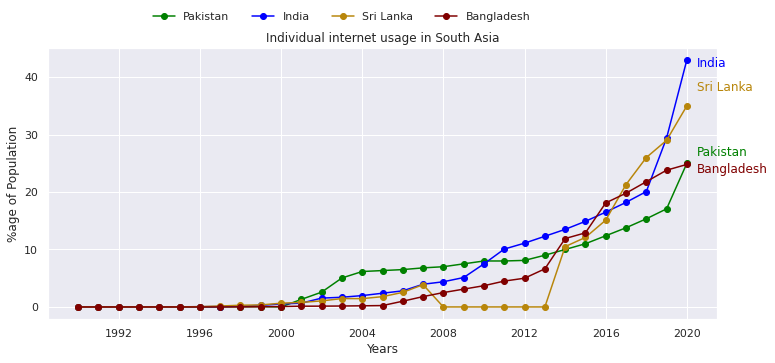

In [21]:
fig,ax = plt.subplots(figsize=(12,5))
#plt.figure(figsize=(12,6))
ax.plot(SA_T["Pakistan"],marker='o',label="Pakistan",c="green")
ax.text(0.97,0.6,s="Pakistan",transform=ax.transAxes,c="green")
ax.plot(SA_T["India"],marker='o',label="India",c="blue")
ax.text(0.97,0.93,s="India",transform=ax.transAxes,c="blue")
ax.plot(SA_T["Sri Lanka"],marker='o',label="Sri Lanka",c="darkgoldenrod")
ax.text(0.97,0.84,s="Sri Lanka",transform=ax.transAxes,c="darkgoldenrod")
ax.plot(SA_T["Bangladesh"],marker='o',label="Bangladesh",c="maroon")
ax.text(0.97,0.54,s="Bangladesh",transform=ax.transAxes,c="maroon")

ax.set_xlabel("Years")
ax.set_ylabel("%age of Population")
ax.set_title("Individual internet usage in South Asia")
ax.legend(loc=(0.15,1.08),ncol=4,frameon=False)
#plt.savefig("SA.png")


